In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black', 
            'axes.grid': False
            }, 
        
        style='ticks',
        font_scale=2
        )

from scipy.stats import pearsonr
from sklearn.metrics import r2_score

In [2]:
from loocv_regression import RebalancedLeaveOneOutRegression
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_auc_score
# from rebalancedcv import RebalancedLeaveOneOut

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
# from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black', 
            'axes.grid': False
            }, 
        
        style='ticks',
        font_scale=2
        )

from scipy.stats import pearsonr
from sklearn.metrics import r2_score

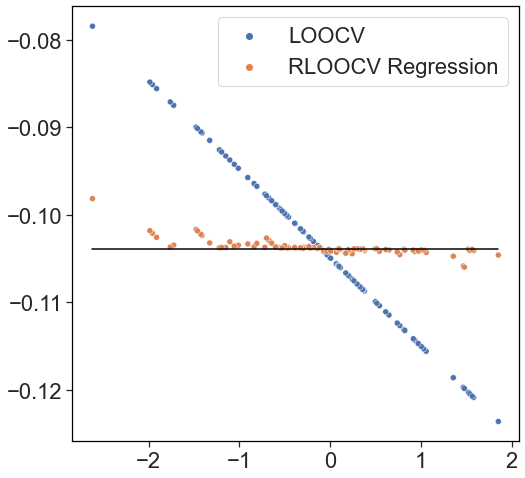

In [3]:
np.random.seed(42)
y=np.random.normal(size=100)

plt.figure(figsize=(8,8))
ax=sns.scatterplot(x=list(y)*2, 
                   y=[y[train_inds].mean() 
                      for train_inds, test_inds 
                      in LeaveOneOut().split(y, y)] + \
                        [y[train_inds].mean() 
                      for train_inds, test_inds 
                      in RebalancedLeaveOneOutRegression().split(y, y)], 
                   hue=['LOOCV']*y.shape[0] + \
                           ['RLOOCV Regression']*y.shape[0],
#                    palette={'LOOCV':'red'}
                   )

sns.lineplot(y=[y.mean(), y.mean()], 
             x=[y.min(), y.max()], 
             color='black')

# plt.title('Training dataset averages in Regression on random normal data\n')
plt.savefig('../plots-latest/RLOOCVreg_visualization.pdf', 
            format='pdf', 
            dpi=900, 
            bbox_inches='tight'
            )

plt.show()

In [4]:
r2_score(y, 
         [y[train_inds].mean() 
          for train_inds, test_inds 
          in LeaveOneOut().split(y, y)]
         )

-0.020304050607080626

In [5]:
pearsonr(y, 
         [y[train_inds].mean() 
          for train_inds, test_inds 
          in LeaveOneOut().split(y, y)]
         )

(-1.0, 0.0)

In [6]:
r2_score(y, 
         [y[train_inds].mean() 
          for train_inds, test_inds 
          in RebalancedLeaveOneOutRegression().split(y, y)]
         )

-0.001368002147950298

In [7]:

def generate_dataset(n_features=2,
                     n_samples=250,
                     seed=42
                     ):
    np.random.seed(seed)
    X=np.random.normal(size=(n_samples, n_features))
    y=np.random.normal(size=n_samples)
    
    return(X, y)

In [8]:
from sklearn.linear_model import Ridge, LinearRegression
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [9]:
all_base_r2s=[]
all_new_r2s=[]

all_base_spearmanrs = []
all_new_spearmanrs = []

all_base_pearsonrs  = []
all_new_pearsonrs = []

for seed in range(25):
    np.random.seed(seed)
    X,y=generate_dataset(seed=seed)
    
    v1p=cross_val_predict(
                    LinearRegression(),
                      X, 
                      y, 
                      cv=LeaveOneOut())

    v2p=cross_val_predict(LinearRegression(),
                      X, 
                      y, 
                      cv=RebalancedLeaveOneOutRegression())
    
    all_base_r2s.append(r2_score(y, v1p))
    all_new_r2s.append(r2_score(y, v2p))
    

In [10]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
wilcoxon(all_base_r2s, all_new_r2s, alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=5.960464477539063e-08)

In [11]:
ttest_1samp(all_base_r2s, 0)

Ttest_1sampResult(statistic=-7.634696981071814, pvalue=7.145044056306399e-08)

In [12]:
ttest_1samp(all_new_r2s, 0)

Ttest_1sampResult(statistic=-3.532299819359193, pvalue=0.0017007616297825261)

In [13]:
pd.DataFrame({'$R^2$':all_base_r2s + all_new_r2s, 
                  'Method':['LOOCV']*len(all_base_r2s) + \
                              ['RLOOCV Regression']*len(all_new_r2s),
                  }).groupby(['Method'])['$R^2$'].describe().round(4)

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
LOOCV,25.0,-0.0143,0.0093,-0.0249,-0.0217,-0.0161,-0.0101,0.0126
RLOOCV Regression,25.0,-0.0065,0.0093,-0.0174,-0.0141,-0.0090,-0.0014,0.0191


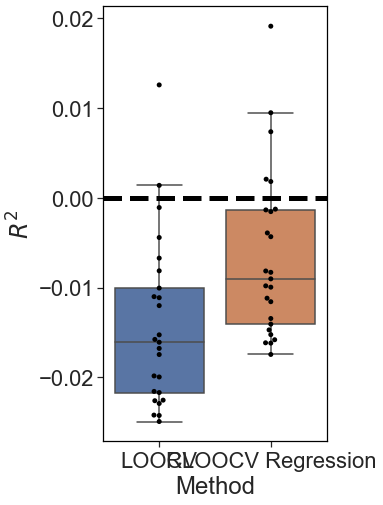

In [15]:
plot_data_ = \
    pd.DataFrame({'$R^2$':all_base_r2s + all_new_r2s, 
                  'Method':['LOOCV']*len(all_base_r2s) + \
                              ['RLOOCV Regression']*len(all_new_r2s),
                  
                  })

plt.figure(figsize=(4,8))
ax=sns.boxplot(
            y='$R^2$', 
            x='Method', 
            data=plot_data_, 
            fliersize=0
            )
ax.get_legend_handles_labels()

sns.swarmplot(
            y='$R^2$', 
            x='Method', 
            data=plot_data_, 
            s=5, 
              color='black', 
              dodge=True,
            ax=ax
            )

plt.plot([-.5, 8.5], [0, 0], '--',
             linewidth = 5, 
             color='black'
             )


plt.savefig('../plots-latest/RLOOCVreg_simulations_R2s.pdf', 
            format='pdf', 
            dpi=900, 
            bbox_inches='tight'
            )

plt.show()